In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [2]:
data = load_breast_cancer()
X = data.data
X.shape

(569, 30)

In [3]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
import seaborn as sns
import pandas as pd

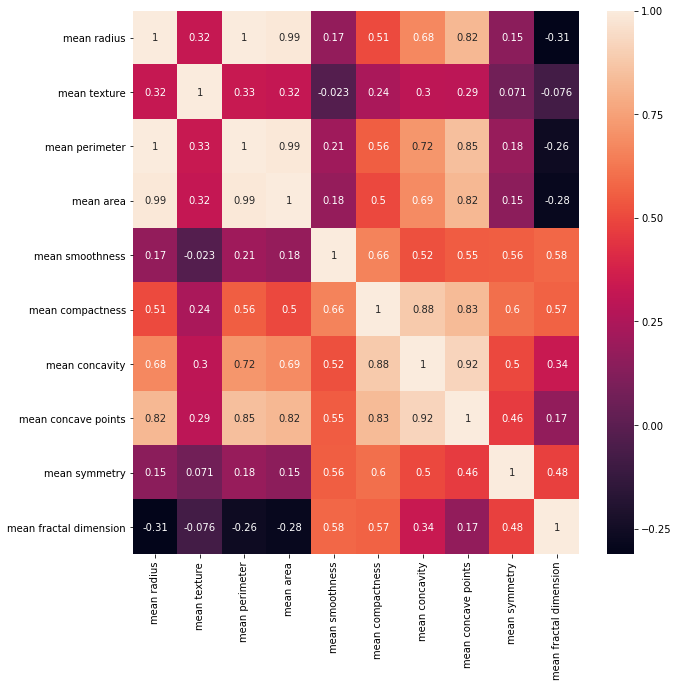

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.DataFrame(data.data,columns=data.feature_names)
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:10].corr(),annot=True)

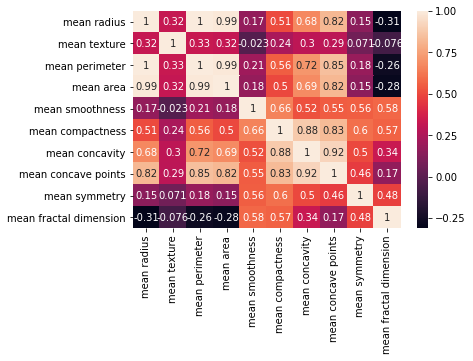

In [7]:

df = pd.DataFrame(X, columns=data.feature_names)
sns.heatmap(df.iloc[:,:10].corr(),annot=True)

In [8]:
#step 1: sca
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [32]:
#step 2: call PCA
from sklearn.decomposition import PCA
pca = PCA()
Z = pca.fit_transform(X_std)

In [33]:
Z.shape

(569, 30)

In [34]:
print(X_std[:3, :5])

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]]


In [35]:
print(Z[:3, :5])

[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859 ]]


In [36]:
#Todo: investigat the distrbution before and after transform
#Todo: look at max dimenstion possitble when m < n

In [37]:
# look at the components
pca.components_.shape

(30, 30)

In [38]:
pca.components_[:3, :3]

array([[ 0.21890244,  0.10372458,  0.22753729],
       [-0.23385713, -0.05970609, -0.21518136],
       [-0.00853124,  0.0645499 , -0.00931422]])

In [39]:
#variance explained along a particular PC
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [40]:
# get X back from Z
print(pca.inverse_transform(Z)[:5, :5])
print(X_std[:5, :5])

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]


In [47]:
# get the first pca 
print(pca.explained_variance_ratio_[0])
print(((pca.singular_values_)**2)[0]/sum((pca.singular_values_)**2))

0.4427202560752632
0.4427202560752633


In [50]:
# cumulative sum 
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])